In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/UGBA167")

Mounted at /content/drive/


In [2]:
import pandas as pd
import mba263

In [3]:
data = pd.read_csv("tuscan_rfm.csv")

In [4]:
data.head()

,numords,totdol,last,buyer,dollars,rfm1,rfm2
0,7,493,207,no,0,222,211
1,4,423,625,no,0,421,422
2,4,246,28,no,0,134,122
3,3,271,778,no,0,523,532
4,2,148,396,no,0,343,343


In [5]:
data.shape

(96551, 7)

## **1. What percent of customers responded (i.e. bought anything) from this catalog?**

2.45% of customers bought something after being sent this catalog

In [6]:
percentage_responded = len(data[data['buyer'] == 'yes']) / len(data)
print(percentage_responded)

mba263.tabulate(data['buyer'])

0.0245569698915599


,Name,Count,Frequency
0,no,94180,0.975443
1,yes,2371,0.024557


## **2. Of those who bought, what was the average dollars ordered from this catalog?**

The average spending from those who ordered from the catalogue was $104.24

In [7]:
data[ ['dollars', 'buyer'] ].groupby('buyer').mean()

,dollars
buyer,
no,0.000000
yes,104.242935


## **3. Creating decile variables for recency, frequency and monetary.**

In [8]:
recency_ntile = mba263.ntile(data['last'],10)
recency_ntile

array([2, 6, 0, ..., 9, 7, 6])

In [9]:
frequency_ntile = mba263.ntile(data['numords'],10)
frequency_ntile

array([8, 6, 6, ..., 0, 0, 3])

In [10]:
monetary_ntile = mba263.ntile(data['totdol'],10)
monetary_ntile

array([8, 7, 6, ..., 6, 1, 1])

## **4. Creating a bar chart showing the response rate (the proportion of customers who bought something) to this catalog by recency decile.**


In [11]:
data['rec_dec'] = recency_ntile
data['frec_dec'] = frequency_ntile
data['mon_dec'] = monetary_ntile

In [12]:
data['buy_dummy'] = pd.get_dummies(data['buyer'])['yes']

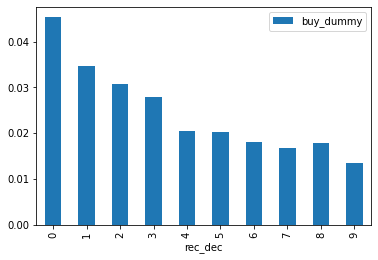

In [13]:
data[ ['buy_dummy','rec_dec'] ].groupby('rec_dec').mean().plot(kind='bar')

## **5. Creating a bar chart showing the bar chart of response rate to this catalog by frequency decile.**


In [14]:
data['frec_dec']=9 - data['frec_dec']

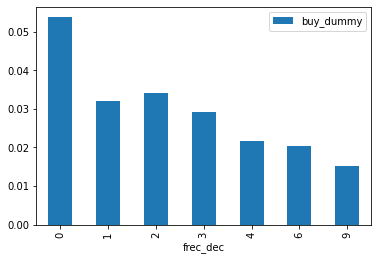

In [15]:
data[ ['buy_dummy','frec_dec'] ].groupby('frec_dec').mean().plot(kind='bar')

## **6. Creating a bar chart showing the bar chart of response rate to this catalog by monetary decile.**

In [16]:
data['mon_dec'] = 9 - data['mon_dec']

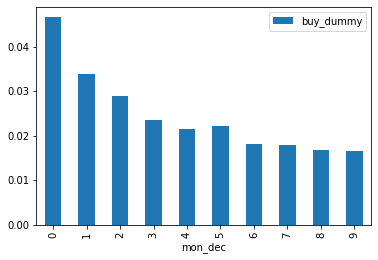

In [17]:
data[ ['buy_dummy','mon_dec'] ].groupby('mon_dec').mean().plot(kind='bar')

## **7. Using only those customers who placed an order from this catalog, I'll create three bar charts showing the average dollars ordered from this catalog by recency, frequency and monetary deciles, respectively**

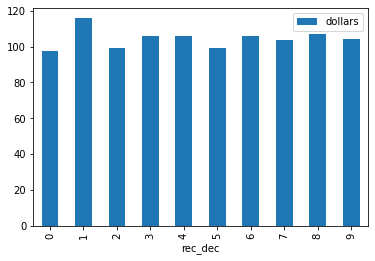

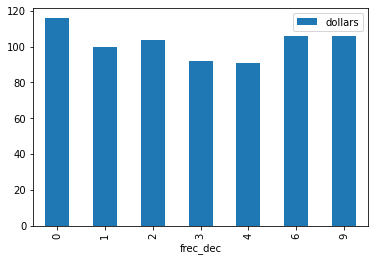

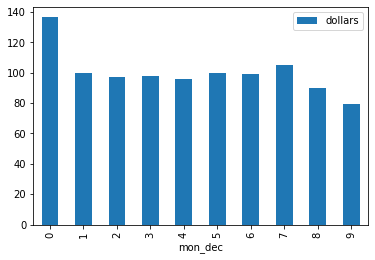

In [18]:
q7_df = data[ ['rec_dec', 'frec_dec', 'mon_dec', 'dollars', 'buy_dummy'] ]
q7_df = q7_df.loc[q7_df['buy_dummy'] == 1]

q7_df[ ['dollars', 'rec_dec'] ].groupby('rec_dec').mean().plot(kind='bar')
q7_df[ ['dollars', 'frec_dec'] ].groupby('frec_dec').mean().plot(kind='bar')
q7_df[ ['dollars', 'mon_dec'] ].groupby('mon_dec').mean().plot(kind='bar')

## 8. What do the above bar charts reveal about the likelihood of response and the size of the order across the different recency, frequency, and monetary deciles?

The chart for recency tells us that recency is not a good indicator of whether or not a customer is going to spend a lot of money through the marketing tactic of mailing catalogs as the amount of money spent across all deciles is about the same. Although the chart for frecuency does vary a little bit more than the recency chart, I'd say that it's also not a good indicator for money spent after mailing a catalogue as the money spent is similar across deciles.

The chart for monetary value spent does tell us that customer who in the past had spent a lot of money will spend a lot of money after being sent a catalogue as we can see that the 0 decile spent significantly more money that the rest of the deciles. 

##9. What would happen if we mailed to the 1,834,469 (=1,931,020-96,551) remaining customers.

(a) What would be the expected gross profit in dollars?

(b) What would be the expected gross profit as a % of expected gross sales?

(c) What would be the expected return on marketing expenditures (gross profit/cost to mail catalogs)?

**Assuming that:**

Cost to produce and mail catalog = $1
COGS and variable costs on orders = 50% (of sales revenues) 

**9a. The expected gross profit in dollars would be = 513,551.00**

Formula: (1834469 * response_rate (about 0.024557) * (average spent * 0.50)) - (1*1834469)

In [19]:
avg_spent = q7_df['dollars'].mean()
print(avg_spent)

gross_profit = ((1834469 * percentage_responded ) * (avg_spent * 0.50)) - (1 * 1834469) 
gross_profit

104.2429354702657


513551.0

**9b. The expected gross profit as a % of expected gross sales = 10.9%**

In [20]:
q9b = gross_profit / ((1834469 * percentage_responded ) * avg_spent)
q9b

0.1093583104062146

**9c. The expected return on marketing expenditures (gross profit/cost to mail catalogs) = 27.9%**

In [21]:
q9c = gross_profit / (1 * 1834469)
q9c

0.27994531387556837

## **10. What is the breakeven response rate?**

<br>
Break even formula:
$$\text{Break even response}=\frac{\text{Cost of mailing}}{\text{Profit per sale}}$$

**1.9%**

In [22]:
breakeven = 1 / (avg_spent * 0.50)
breakeven

0.019185952419485355

## **11. If we considered mailing only to those of the remaining 1,834,469 customers in RFM cells (using the sequential n-tiles approach) with a response rate that is equal to or greater than the breakeven response rate, what would be 

(a) the expected gross profit in dollars

(b) the expected gross profit as a % of expected gross sales

(c) the expected return on marketing expenditures (gross profit/cost to mail catalogs)

In [25]:
data['responserate_iq']=mba263.get_means(data['buy_dummy'],data['rfm2'])
data['mailto_iq']=(data['responserate_iq']>0.0192)*1

datamailing = data[data['mailto_iq']==1]
datamailing.head()

mba263.tabulate(datamailing['buy_dummy'])

,Name,Count,Frequency
0,0,50905,0.966453
1,1,1767,0.033547


In [26]:
num_customers = len(datamailing)
print("Number of customers:", num_customers)
num_buyers = num_customers * 0.033547
print("Number of buyers:", num_buyers)

q11_gross_profit = ((num_buyers) * (avg_spent * 0.50)) - (1 * num_customers) 
print(q11_gross_profit)

q11b = q11_gross_profit / ((num_buyers) * (avg_spent * 0.50))
print(q11b)

q11c = q11_gross_profit / (1 * num_customers)
print(q11c)

Number of customers: 52672
Number of buyers: 1766.987584
39425.986347836355
0.42808738726308304
0.7485188781105019


11a) The expected gross profit in dollars: **$39,425.98**

11b) The expected gross profit as a % of expected gross sales: **42.8%**

11c) The expected return on marketing expenditures (gross profit/cost to mail catalogs): **74.8%**

If we mail to the subset of customers in the 'profitable' segments, we would have a higher ROI, but we don't want to only mail to this customer because we would be losing the opportunity of gaining new customers. We also don't want to send so much mail to the profitable customers to the point where it's spam.
